# Задание 
## Часть 1

1. Найти данные на сайте РосСтат или (https://rosstat.gov.ru) или на сайте: https://www.kaggle.com , распределение которых было бы близко к

a) нормальному (визуально выглядит как кривая Гаусса - «колокол»), 

b) равномерному.

2. Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.

3. Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),  дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).




## Часть 2

- Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или  корреляционный анализ и т.п.).


# Импорт библиотек

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Загружаем исходные данные

В этом наборе данных представлен полный обзор различных факторов, влияющих на успеваемость учащихся на экзаменах. Она включает информацию об учебных привычках, посещаемости, участии родителей и других аспектах, влияющих на успеваемость.


Полная информация на сайте: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Нормальное распределение

Предполагаем, что близко к нормальному распределению будут данные о количестве часов обучения, проверим это с помощью гистограммы

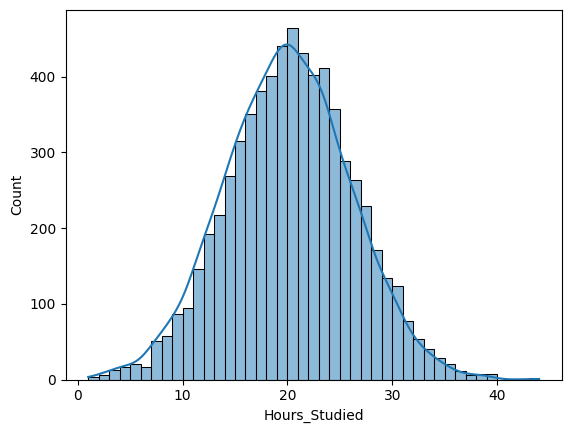

In [3]:
sns.histplot(data=df, x='Hours_Studied', bins=43, kde=True)
plt.show()

# Равномерное распределение

Предполагаем, что близко к равномерному распределению будут данные о посещаемости, проверим это с помощью гистограммы

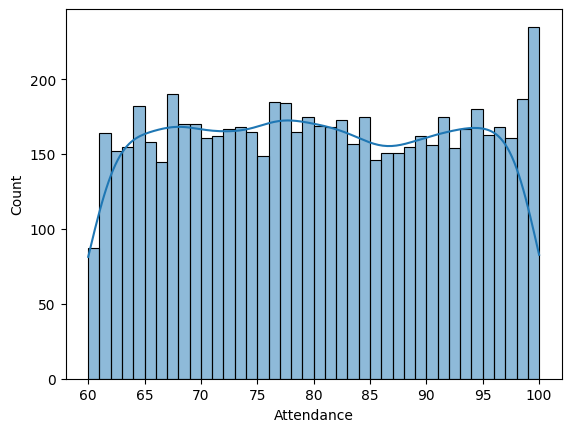

In [4]:
sns.histplot(data=df, x='Attendance', bins=40, kde=True)
plt.show()

# Распределение со смещенной медианой

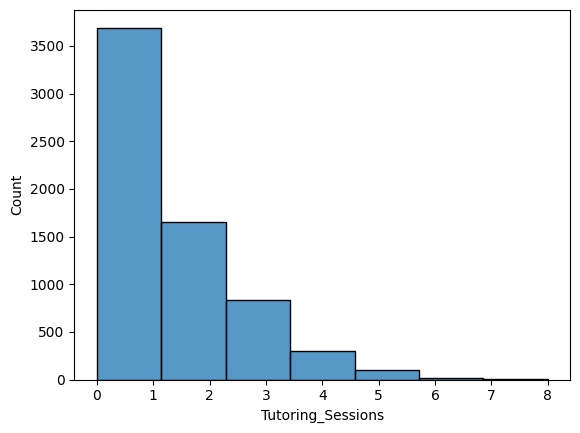

Среднее = 1.4937187831088239
Медиана = 1.0


In [5]:
sns.histplot(data=df, x='Tutoring_Sessions', bins=7)
plt.show()

print(f"Среднее = {df.Tutoring_Sessions.mean()}")
print(f"Медиана = {df.Tutoring_Sessions.median()}")

# Распределение с несмещенной медианой

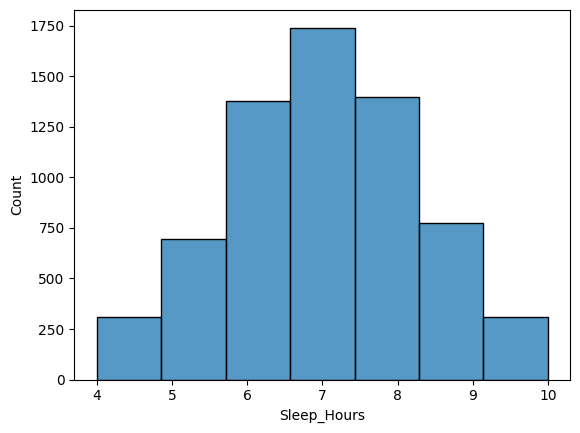

Среднее = 7.029060087785682
Медиана = 7.0


In [6]:
sns.histplot(data=df, x='Sleep_Hours', bins=7)
plt.show()

print(f"Среднее = {df.Sleep_Hours.mean()}")
print(f"Медиана = {df.Sleep_Hours.median()}")

# Описательные характеристики 

Среднее, стандартное отклонение, минимум, максимум, квантили

In [7]:
df[["Hours_Studied", "Sleep_Hours"]].describe()

,Hours_Studied,Sleep_Hours
count,6607.000000,6607.00000
mean,19.975329,7.02906
std,5.990594,1.46812
min,1.000000,4.00000
25%,16.000000,6.00000
50%,20.000000,7.00000
75%,24.000000,8.00000
max,44.000000,10.00000


Мода

In [8]:
print("Мода: ")
df[["Hours_Studied", "Sleep_Hours"]].mode()

Мода: 


,Hours_Studied,Sleep_Hours
0,20,7


# График рассеивания

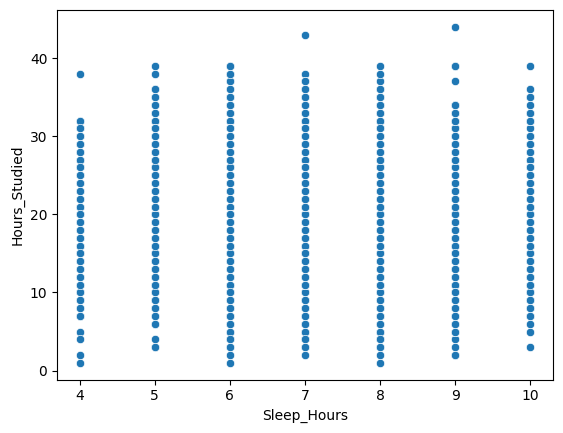

In [9]:
sns.scatterplot(data=df, y="Hours_Studied", x="Sleep_Hours")
plt.show()

# Круговая диаграмма

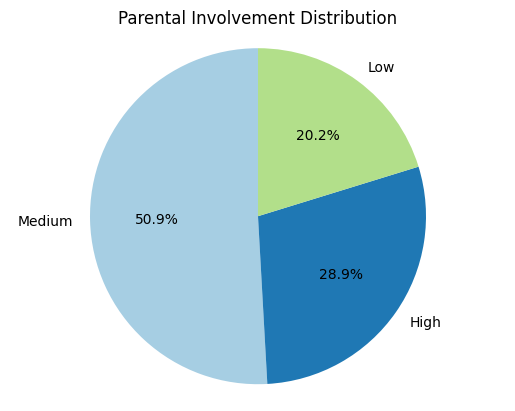

In [10]:
data = df['Parental_Involvement'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Parental Involvement Distribution')
plt.axis('equal') 
plt.show()

# Распределение с аномальными значениями

Каждая запись в базе данных описывает пригород или город Бостона. Данные были взяты из стандартного столичного статистического района (SMSA) Бостона в 1970 году. 

Полная информация на сайте: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

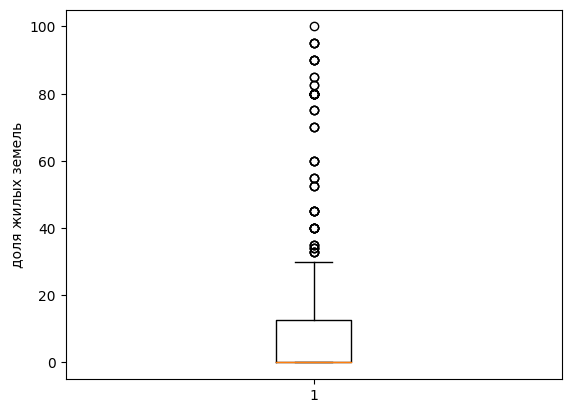

In [11]:
df = pd.read_csv("boston.csv")
plt.boxplot(df.ZN)
plt.ylabel("доля жилых земель")
plt.show()

Аномальные значения в колонке ZN могут быть связаны с тем, что в большинстве районов города плотная застройка, где практически нет крупных участков (ZN < 20), зонированных под большие дома. Однако в некоторых пригородах или элитных районах встречаются участки с большими размерами, что и вызывает редкие высокие значения (ZN > 40). 